In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


results_path = "../../../experiments/12-05-2025"
# folders = [folder for folder in os.listdir(
#     results_path) if os.path.isdir(os.path.join(results_path, folder))]
# datasets = set([name.split('-')[-1].replace('.csv', '') for name in folders])
# datasets

In [3]:
algorithms = ["fdx", "pyro"]
datasets = [
    "abalone",
    "adult",
    "bridges",
    "echocardiogram",
    "iris",
    "letter",
    "ncvoter",
]

In [4]:


fds_results = {}

for dataset in datasets:
    for algorithm in algorithms:
        folder_name = f"{algorithm}-{dataset}"

        # if algorithm == "fdx":
            
        #     folder_name = f"{algorithm}-{dataset}"
        #     print(folder_name)
        # else:
        #     folder_name = f"{algorithm}-{dataset}.csv"
        #     print(folder_name)
        

        folder_path = os.path.join(results_path, folder_name)
        file_path = os.path.join(folder_path, f"{algorithm}-{dataset}.csv")

        print(file_path)
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            fds_results[(algorithm, dataset)] = df
            # print(df.columns)
            # print(folder_path, '\t' ,file_path)


../../../experiments/12-05-2025/fdx-abalone/fdx-abalone.csv
../../../experiments/12-05-2025/pyro-abalone/pyro-abalone.csv
../../../experiments/12-05-2025/fdx-adult/fdx-adult.csv
../../../experiments/12-05-2025/pyro-adult/pyro-adult.csv
../../../experiments/12-05-2025/fdx-bridges/fdx-bridges.csv
../../../experiments/12-05-2025/pyro-bridges/pyro-bridges.csv
../../../experiments/12-05-2025/fdx-echocardiogram/fdx-echocardiogram.csv
../../../experiments/12-05-2025/pyro-echocardiogram/pyro-echocardiogram.csv
../../../experiments/12-05-2025/fdx-iris/fdx-iris.csv
../../../experiments/12-05-2025/pyro-iris/pyro-iris.csv
../../../experiments/12-05-2025/fdx-letter/fdx-letter.csv
../../../experiments/12-05-2025/pyro-letter/pyro-letter.csv
../../../experiments/12-05-2025/fdx-ncvoter/fdx-ncvoter.csv
../../../experiments/12-05-2025/pyro-ncvoter/pyro-ncvoter.csv


In [5]:
headers = [df.columns.tolist() for df in fds_results.values()]
distinct_headers = set(header for sublist in headers for header in sublist)
print("Headers:", distinct_headers)



Headers: {'dataset', 'rfi_prime_plus', 'is_key', 'g3_prime', 'fd', 'lhs_uniqueness', 'algorithm', 'lhs_size', 'mu_plus'}


In [6]:

metrics = ["rfi_prime_plus", "mu_plus", "g3_prime"]

global_df = pd.DataFrame(columns=["algorithm", "dataset", "lhs_size"])

for (algo, dataset), df in fds_results.items():
    if "fd" in df.columns:
        # Create a temporary dataframe with just the metrics that exist in this df
        available_metrics = [m for m in metrics if m in df.columns]
        if not available_metrics:
            continue
            
        temp_df = df[available_metrics].copy()
        
        # Calculate LHS size based on 'fd' structure
        temp_df["lhs_size"] = df["fd"].str.split("->").str[0].str.count(",") + 1
        
        # Add identifying columns
        temp_df["algorithm"] = algo
        temp_df["dataset"] = dataset
        
        # Append to the global DataFrame
        global_df = pd.concat([global_df, temp_df], ignore_index=True)

# Check for correct dataset values
global_df[(global_df['algorithm'] == 'fdx') & (global_df['dataset'] == 'ncvoter')]

,algorithm,dataset,lhs_size,rfi_prime_plus,mu_plus,g3_prime
9930,fdx,ncvoter,1,1.000000,0.000000,1.000000
9931,fdx,ncvoter,2,1.000000,0.000000,1.000000
9932,fdx,ncvoter,3,1.000000,0.000000,1.000000
9933,fdx,ncvoter,2,0.980955,0.000000,0.993964
9934,fdx,ncvoter,2,0.030476,0.004299,0.154472
9935,fdx,ncvoter,1,0.009377,0.003379,0.015449
9936,fdx,ncvoter,1,1.000000,1.000000,1.000000
9937,fdx,ncvoter,2,0.714197,0.737697,0.738095
9938,fdx,ncvoter,1,0.058619,0.003943,0.042126


/tmp/ipykernel_13796/4123828295.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_13796/4123828295.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_13796/4123828295.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


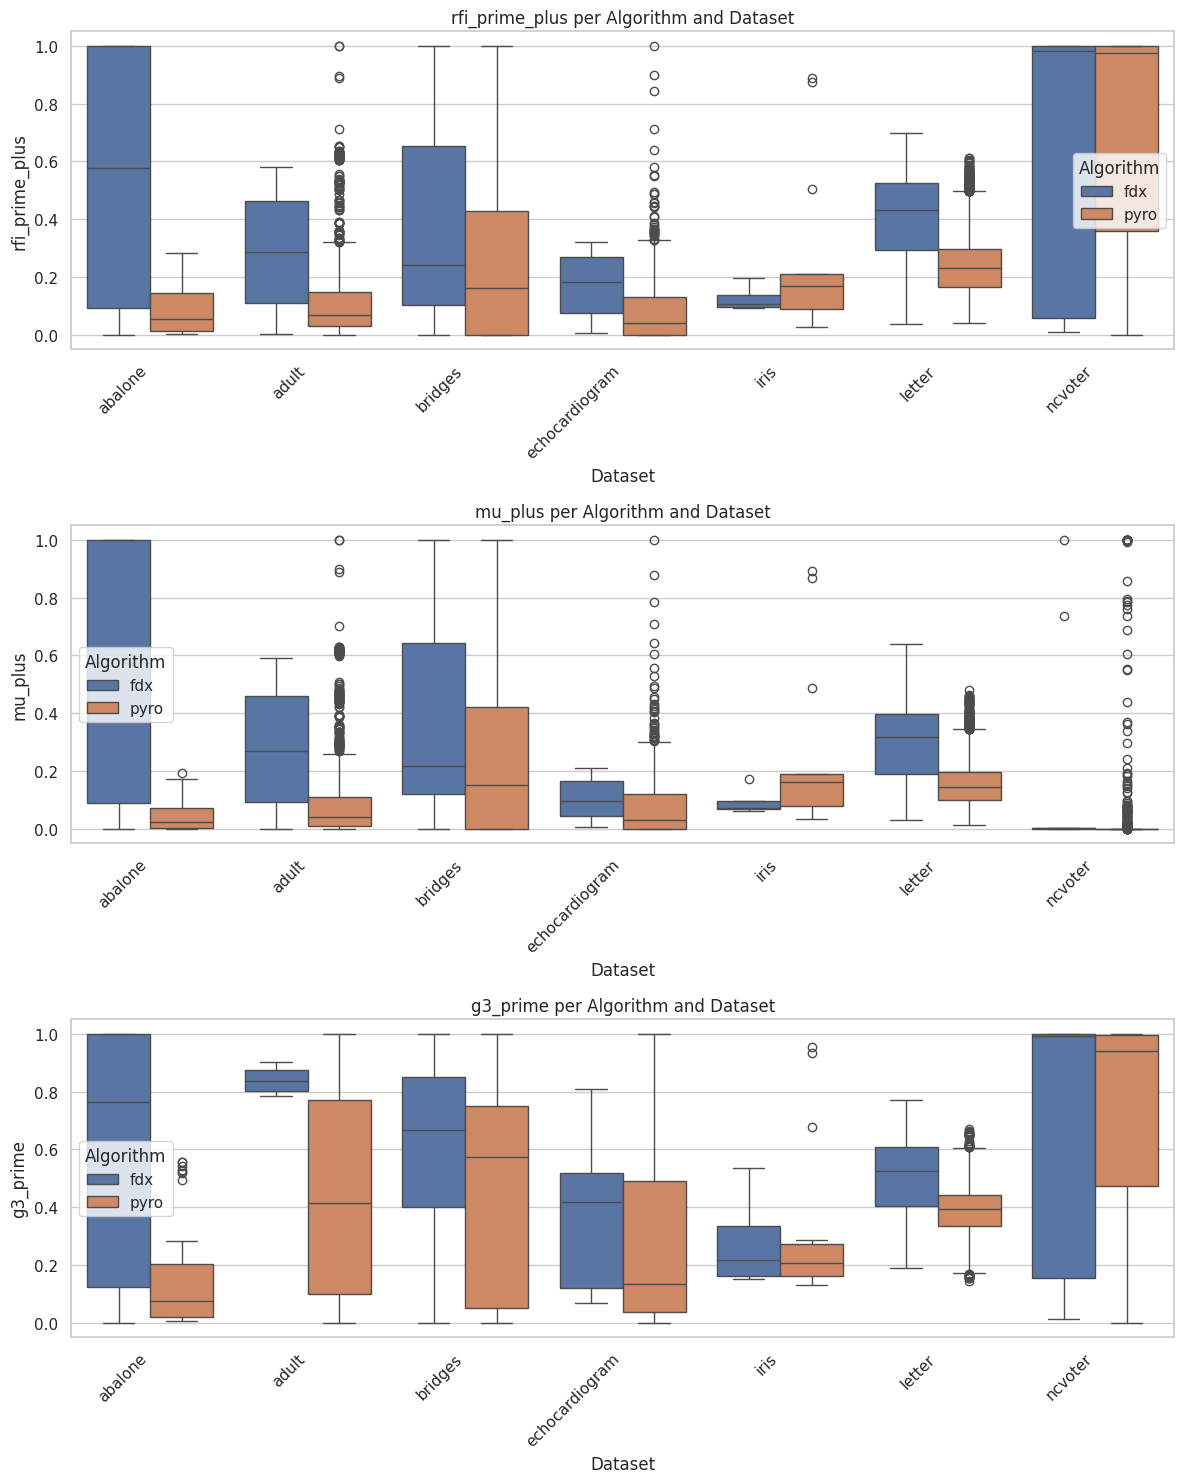

In [7]:
metrics = ["rfi_prime_plus", "mu_plus", "g3_prime"]

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

for i, metric_name in enumerate(metrics):
    sns.boxplot(
        data=global_df,
        x='dataset',
        y=metric_name,
        hue='algorithm',
        ax=axes[i]
    )
    
    # Set appropriate titles and labels
    axes[i].set_title(f'{metric_name} per Algorithm and Dataset')
    axes[i].set_xlabel('Dataset')
    axes[i].set_ylabel(metric_name)
    axes[i].legend(title='Algorithm')
    
    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

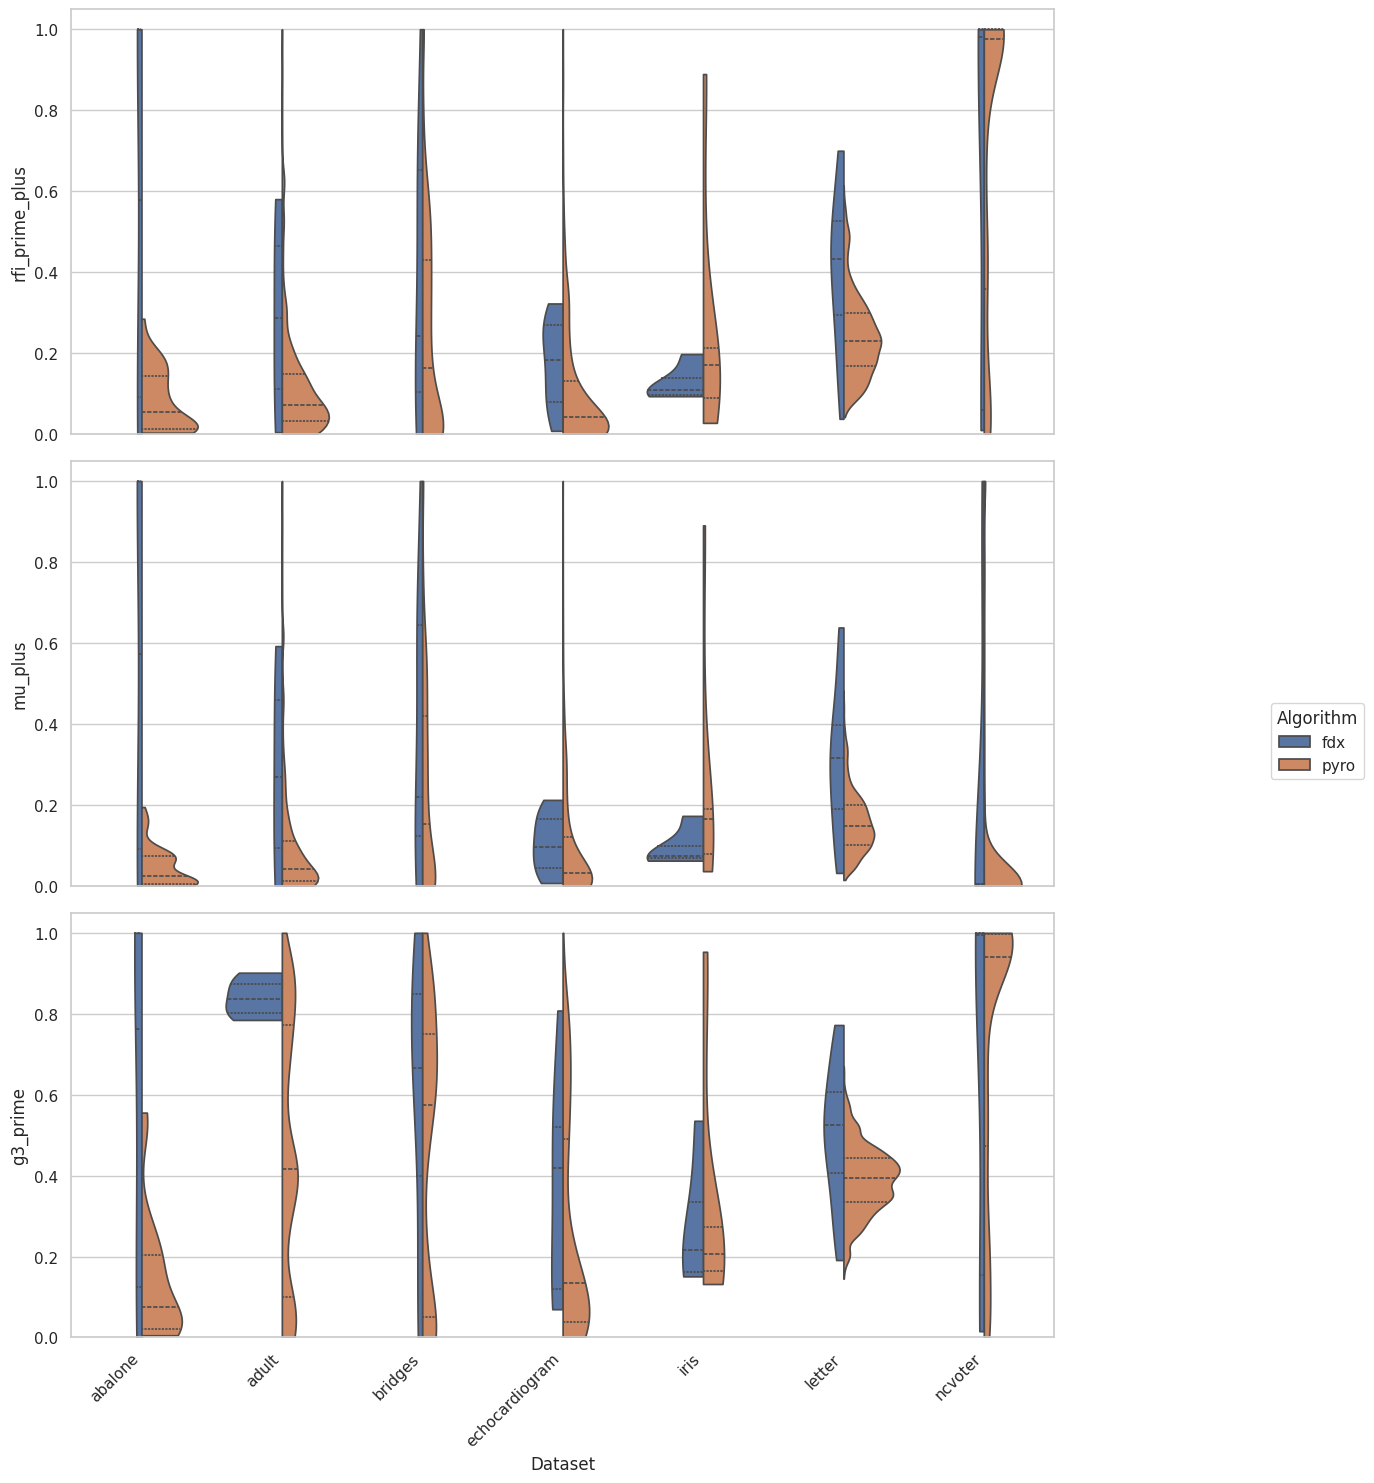

In [11]:

metrics = ["rfi_prime_plus", "mu_plus", "g3_prime"]

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Store handles and labels for the legend
handles, labels = None, None

for i, metric_name in enumerate(metrics):
    # Replace boxplot with violinplot
    ax = sns.violinplot(
        data=global_df,
        x='dataset',
        y=metric_name,
        hue='algorithm',
        split=True,  # Split the violins for better algorithm comparison
        inner='quartile',  # Show quartiles inside the violin
        ax=axes[i],
        cut=0  # Don't extend the violin past the observed data range
    )
    
    # Set y-axis limits based on actual data range
    min_val = global_df[metric_name].min()
    max_val = global_df[metric_name].max()
    # Add a small buffer (5% of range) for readability
    buffer = (max_val - min_val) * 0.05
    axes[i].set_ylim(max(0, min_val - buffer), max_val + buffer)
    
    # Set appropriate titles and labels
    axes[i].set_ylabel(metric_name)
    axes[i].set_title('')
    
    # Remove x-axis labels for all but the bottom plot
    if i < 2:  # For the first two plots
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])  # Remove x-tick labels
    else:  # For the bottom plot
        axes[i].set_xlabel('Dataset')
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Remove individual legends
    axes[i].get_legend().remove()
    
    # Save handles and labels for the combined legend (from the last plot)
    if i == len(metrics) - 1:
        handles, labels = ax.get_legend_handles_labels()

# Create a single legend outside the plots
fig.legend(handles, labels, title='Algorithm', loc='center right', bbox_to_anchor=(1.15, 0.5))

# Adjust spacing between plots
plt.subplots_adjust(hspace=0.1)  # Reduce vertical space between plots

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Make room for the legend on the right
plt.show()

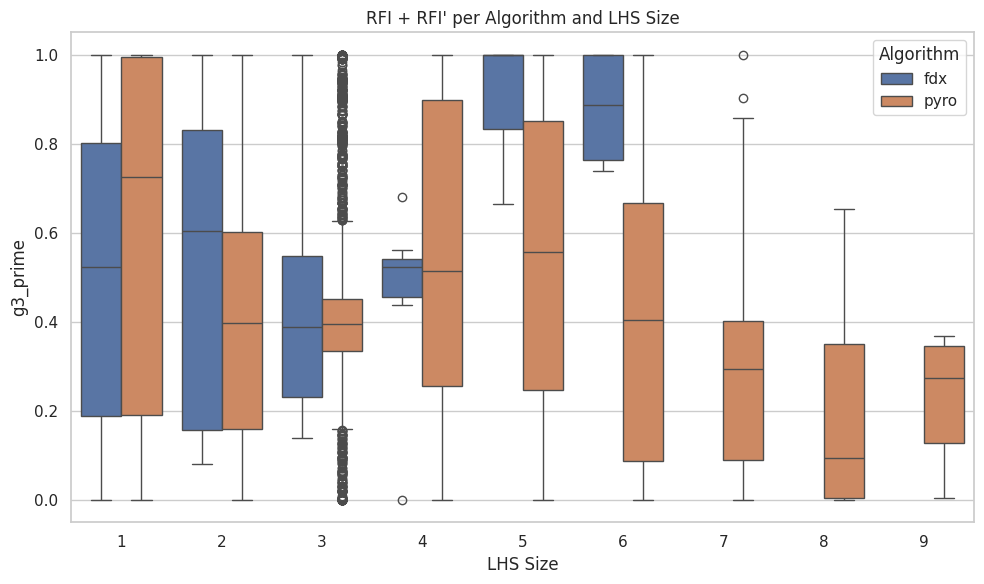

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=global_df,
    x='lhs_size',
    y=metric_name,
    hue='algorithm'
)

plt.title('RFI + RFI\' per Algorithm and LHS Size')
plt.xlabel('LHS Size')
plt.ylabel(metric_name)
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

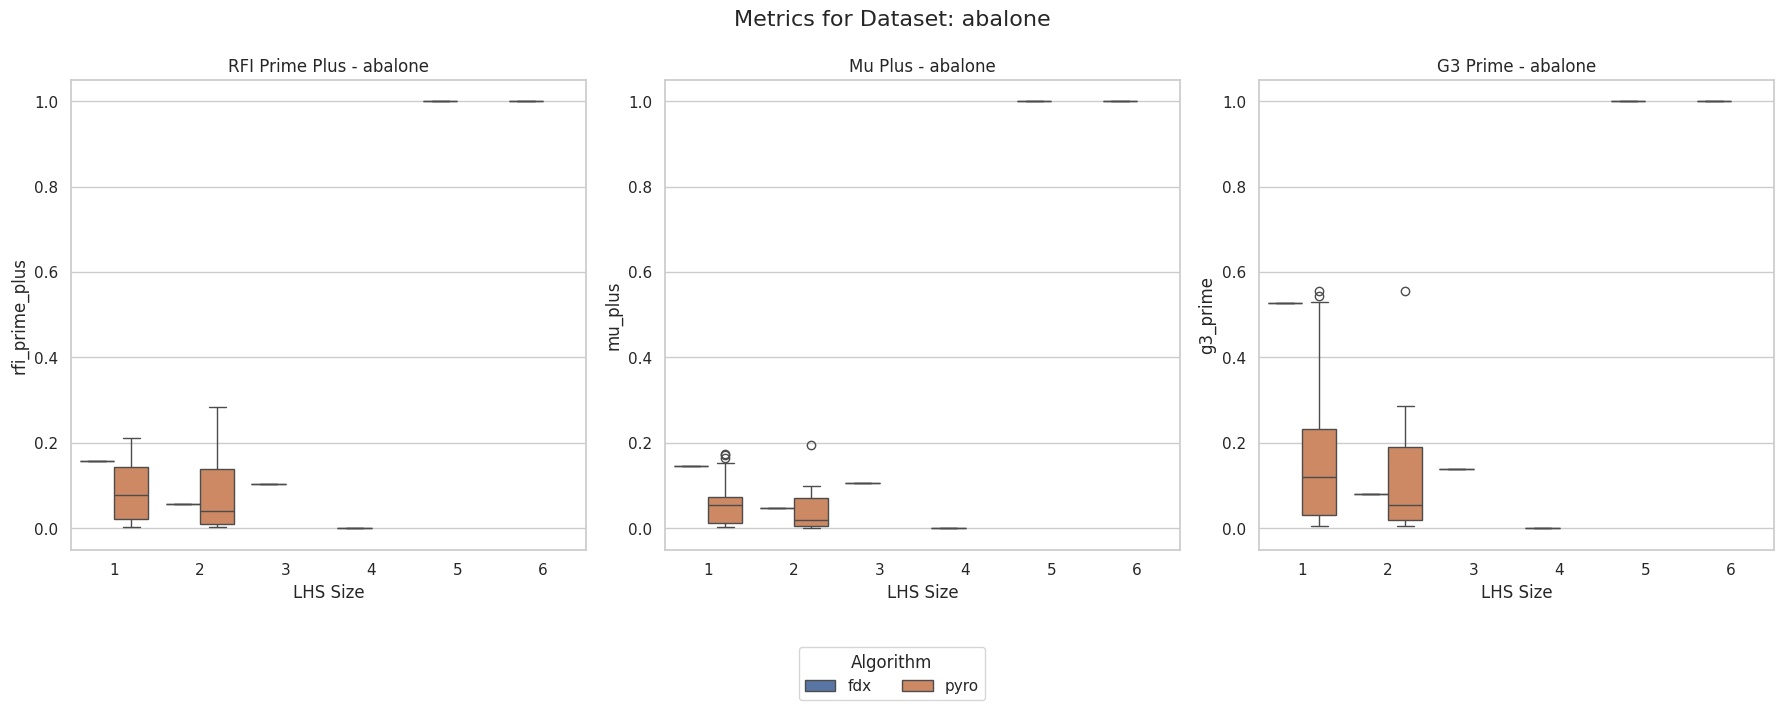

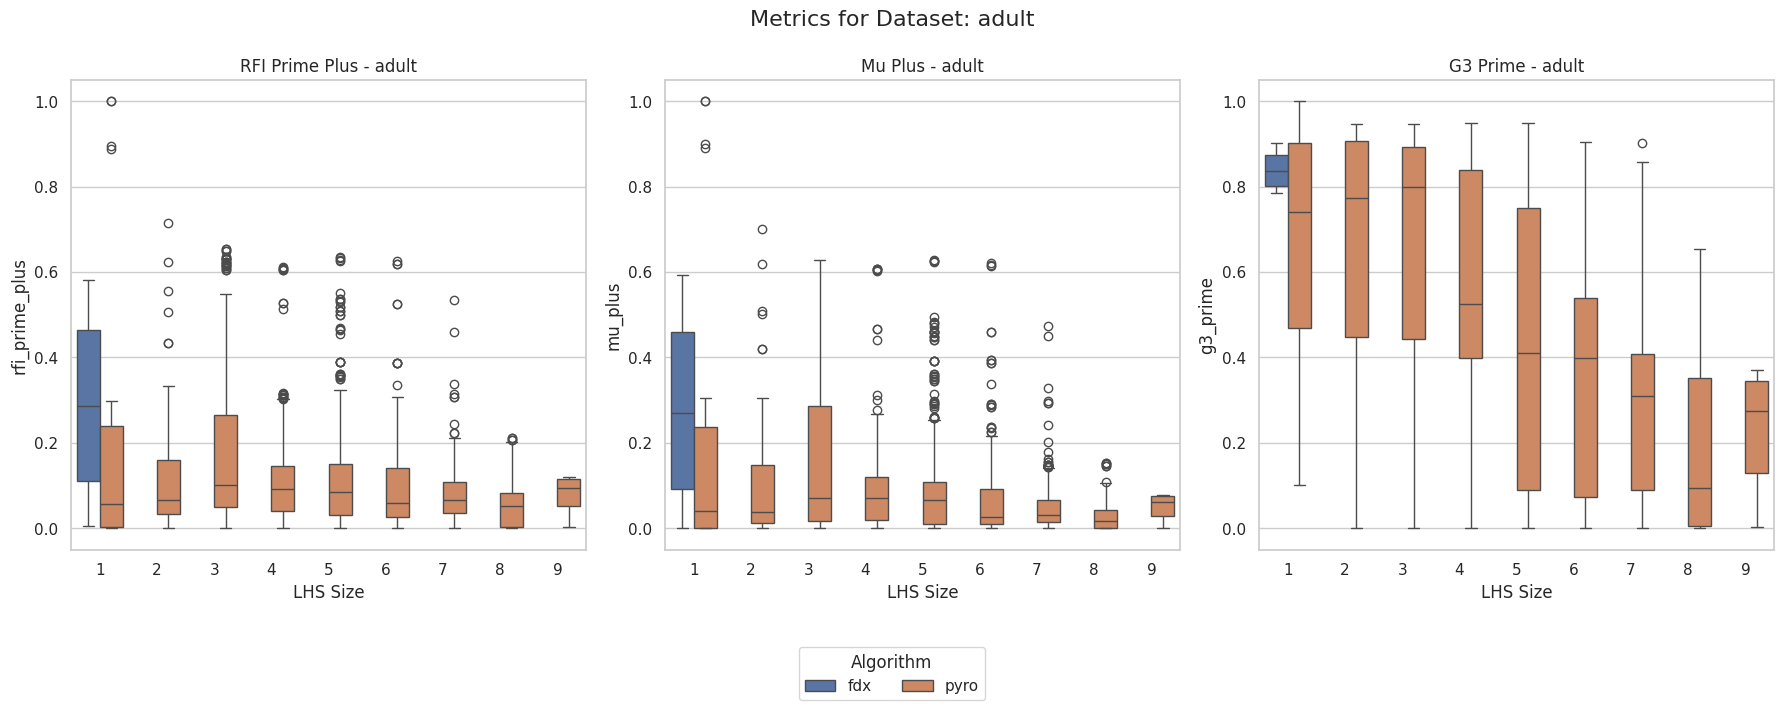

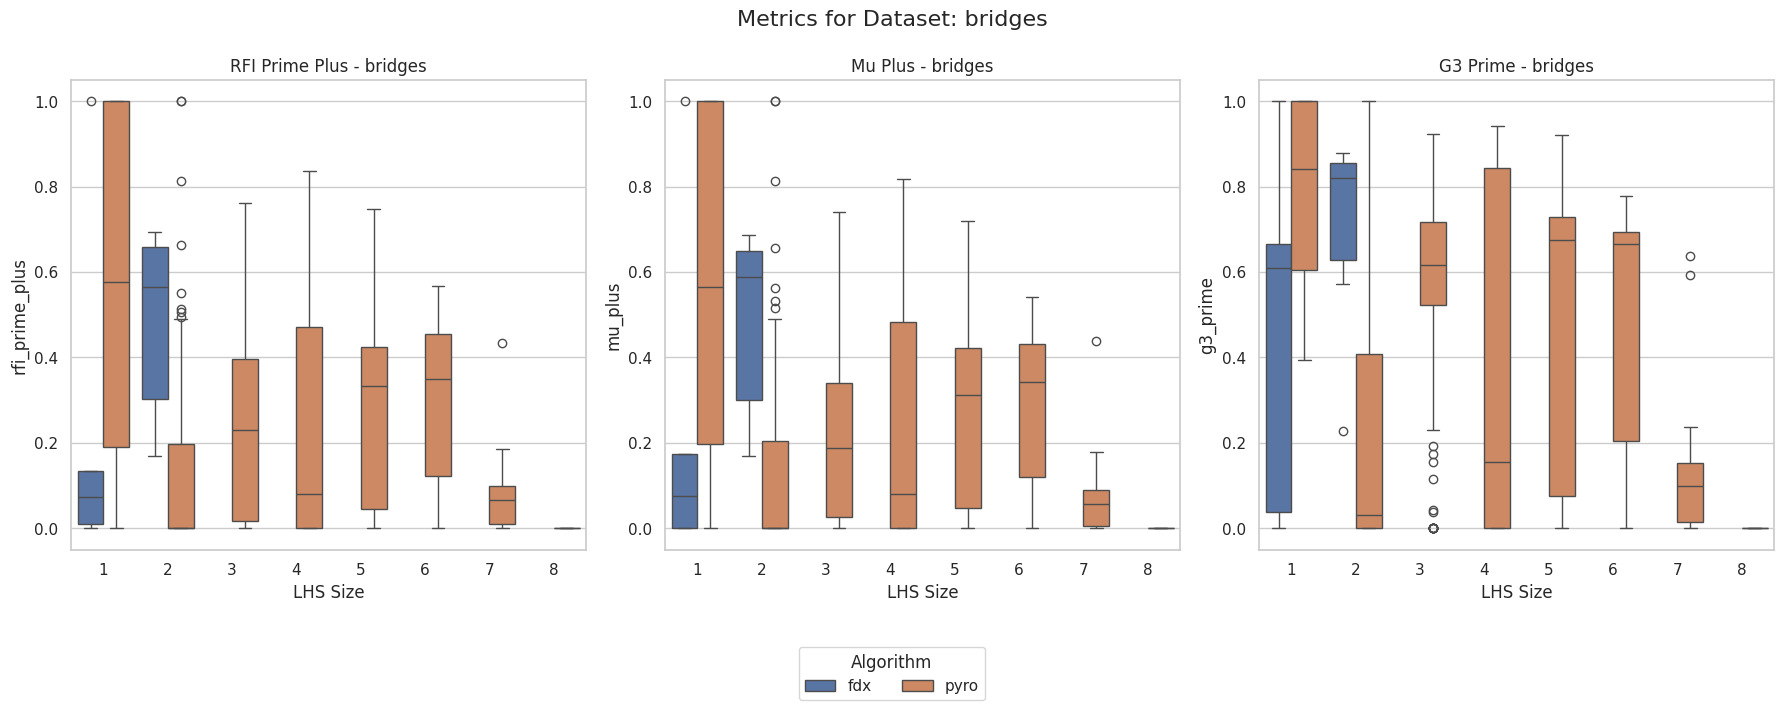

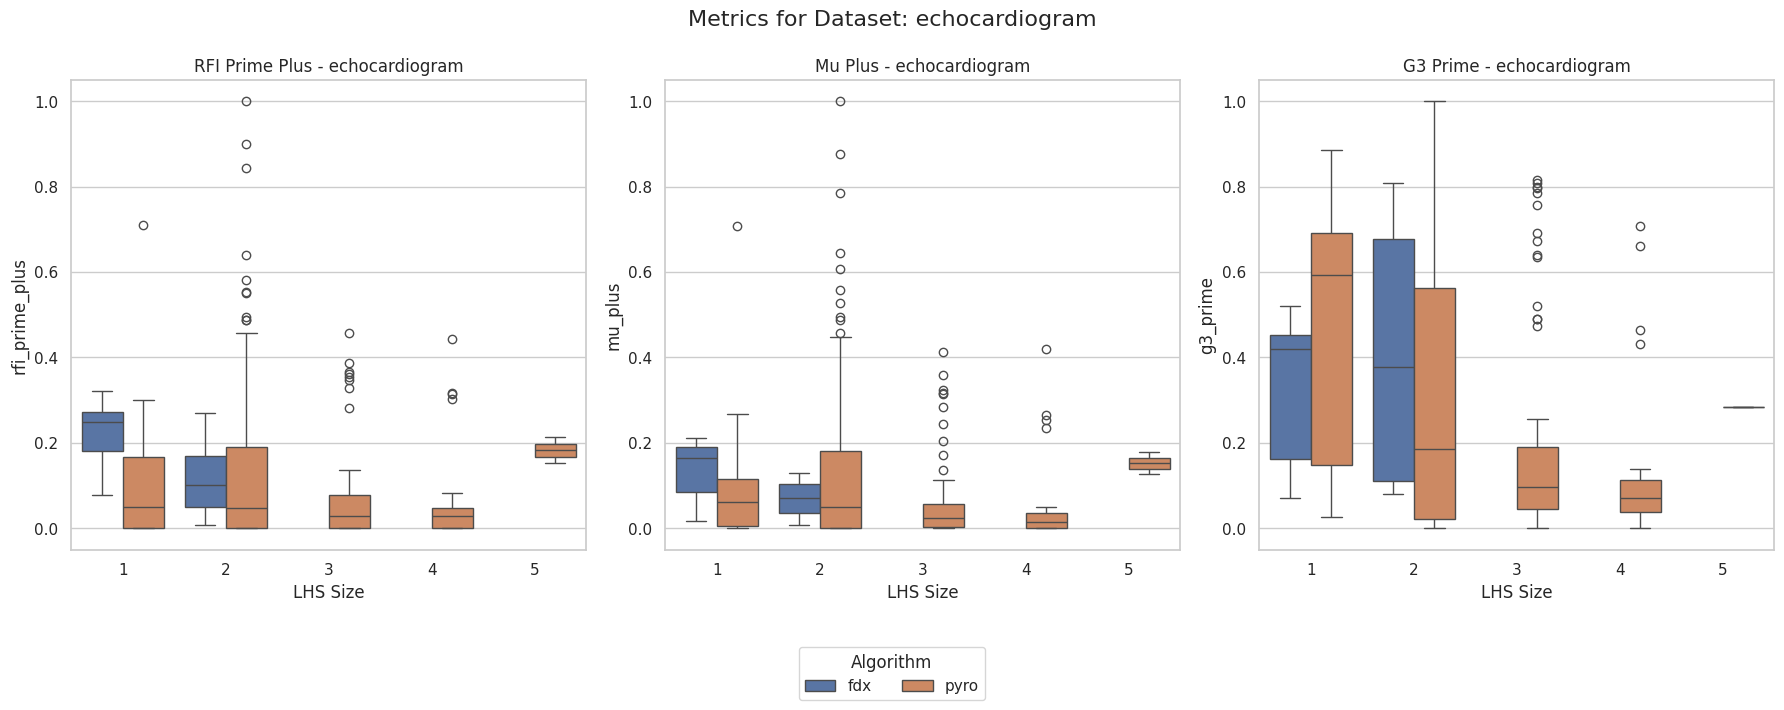

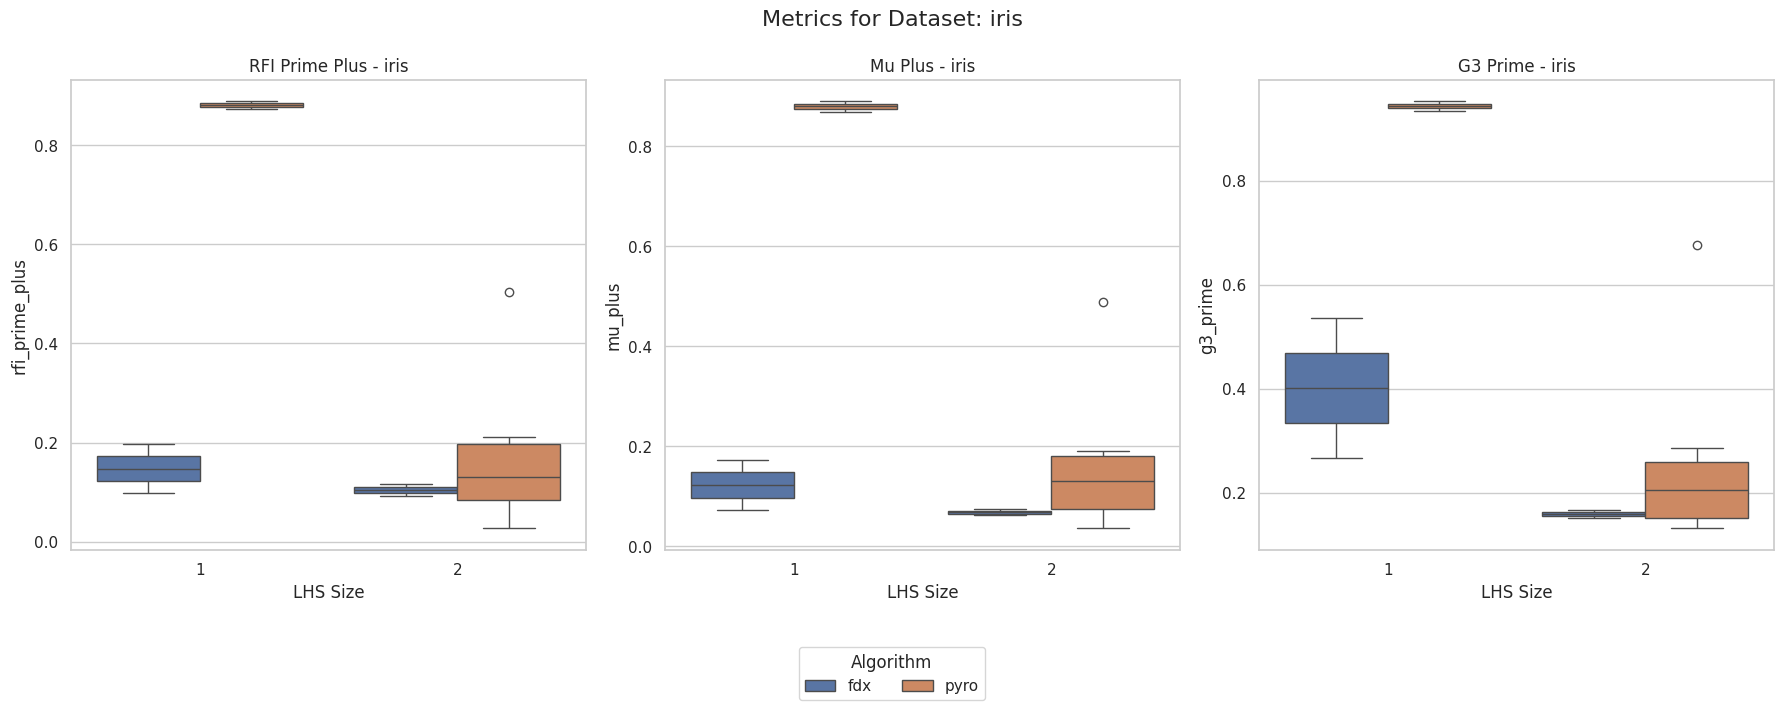

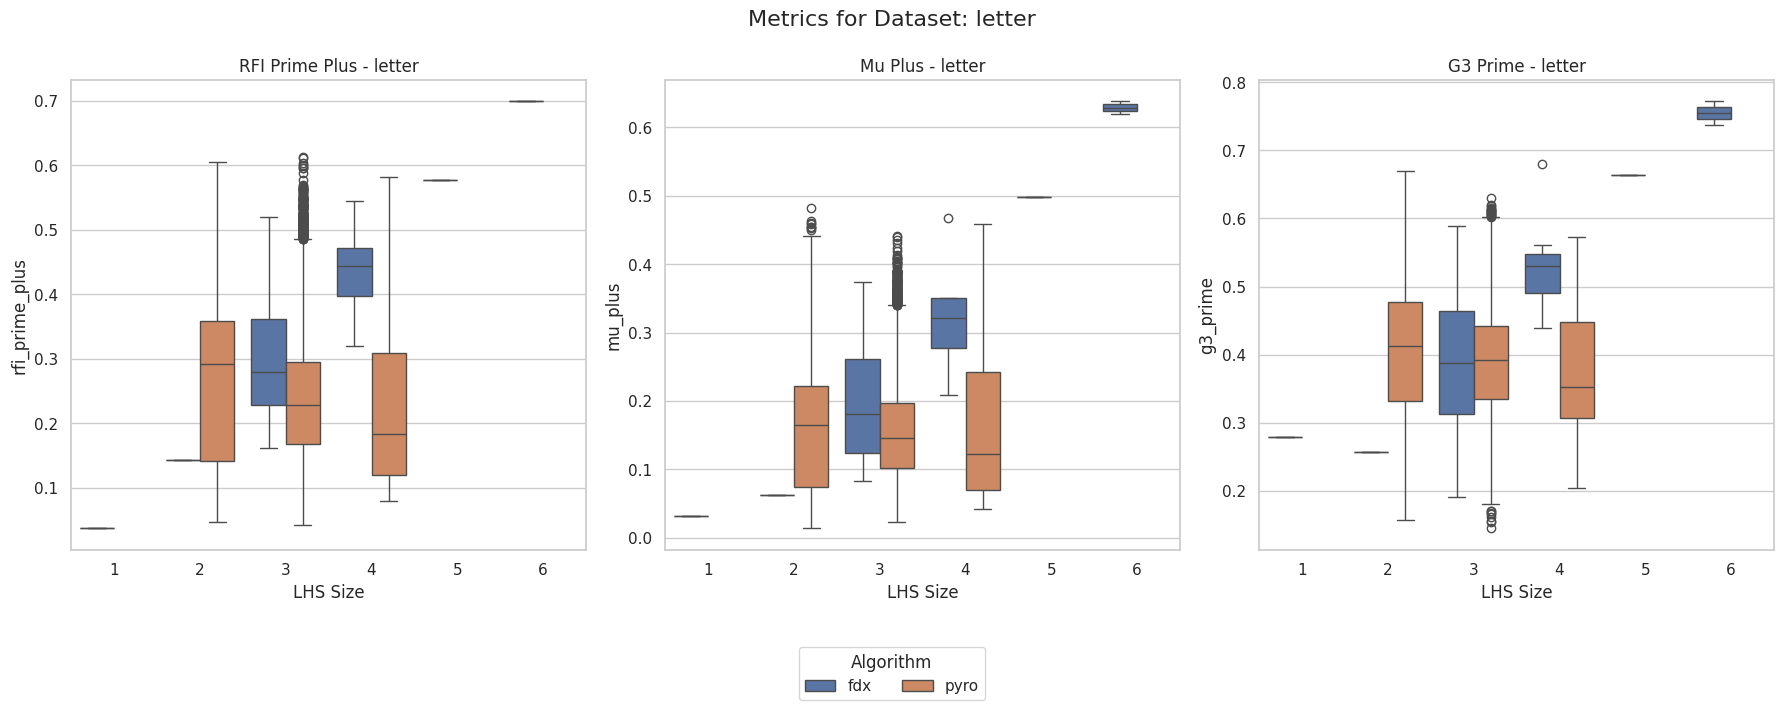

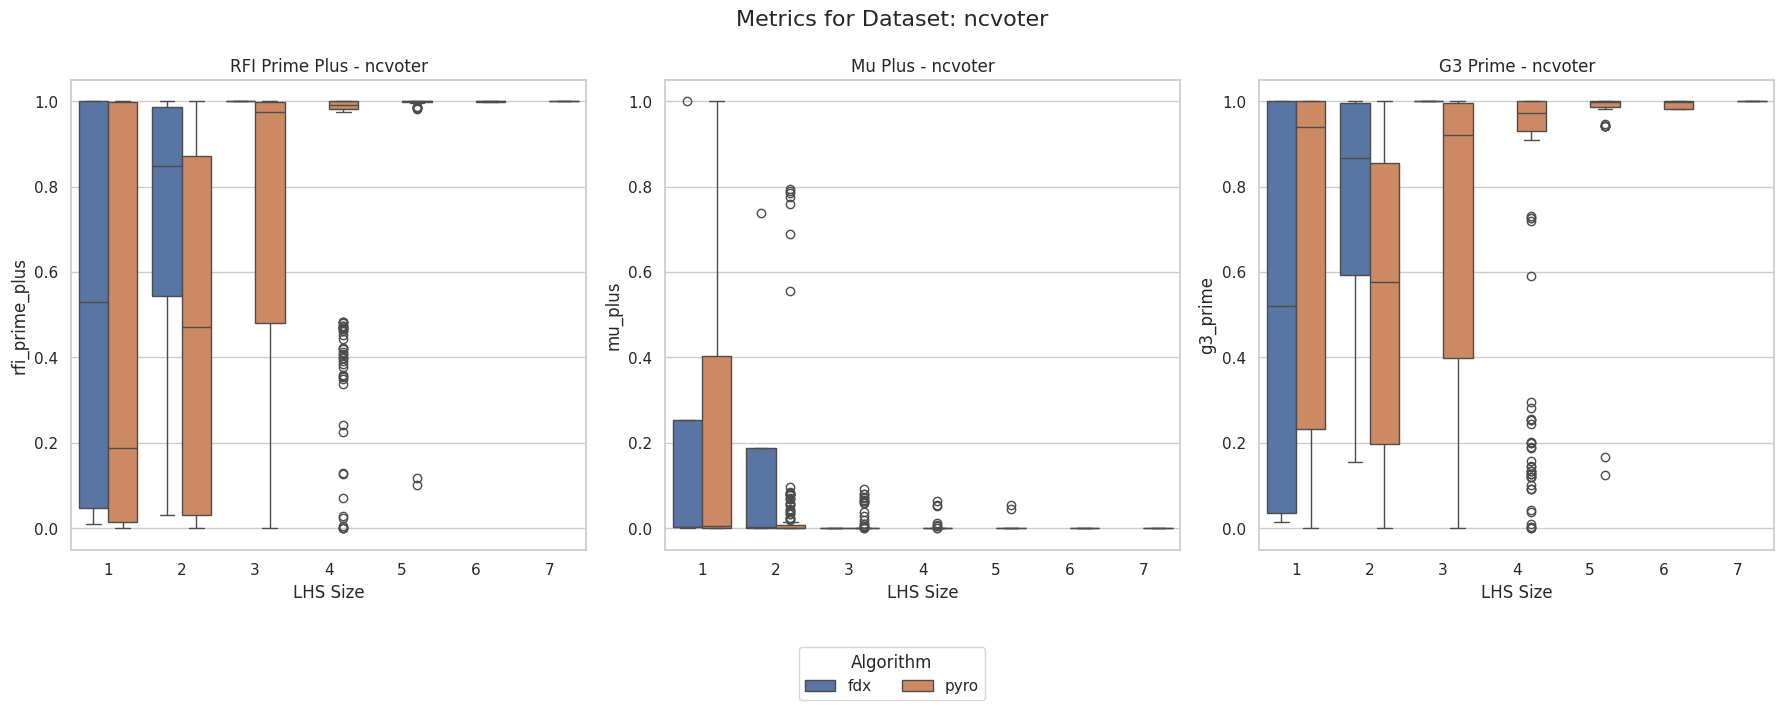

In [13]:
# Get unique datasets
datasets = global_df['dataset'].unique()

# Create a figure for each dataset
for dataset in datasets:
    # Filter data for this dataset
    dataset_df = global_df[global_df['dataset'] == dataset]
    
    # Create a figure with 3 subplots side by side
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
    
    # Plot for rfi_prime_plus
    sns.boxplot(
        data=dataset_df,
        x='lhs_size',
        y="rfi_prime_plus",
        hue='algorithm',
        ax=axes[0]
    )
    axes[0].set_title(f'RFI Prime Plus - {dataset}')
    axes[0].set_xlabel('LHS Size')
    axes[0].set_ylabel('rfi_prime_plus')
    
    # Plot for mu_plus
    sns.boxplot(
        data=dataset_df,
        x='lhs_size',
        y="mu_plus",
        hue='algorithm',
        ax=axes[1]
    )
    axes[1].set_title(f'Mu Plus - {dataset}')
    axes[1].set_xlabel('LHS Size')
    axes[1].set_ylabel('mu_plus')
    
    # Plot for g3_prime
    sns.boxplot(
        data=dataset_df,
        x='lhs_size',
        y="g3_prime",
        hue='algorithm',
        ax=axes[2]
    )
    axes[2].set_title(f'G3 Prime - {dataset}')
    axes[2].set_xlabel('LHS Size')
    axes[2].set_ylabel('g3_prime')
    
    # Only keep one legend
    handles, labels = axes[0].get_legend_handles_labels()
    for ax in axes:
        ax.get_legend().remove()
    fig.legend(handles, labels, title='Algorithm', loc='upper center', bbox_to_anchor=(0.5, 0), ncol=len(labels))
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Make room for the legend at the bottom
    plt.suptitle(f'Metrics for Dataset: {dataset}', fontsize=16, y=1.05)
    plt.show()
